In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [2]:
a =  np.load("classifier.20.weight.neg.npy")
print(a.shape)

(1920, 2)


In [3]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[0])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [4]:
c = b.swapaxes(1,3)
c = (c>0.01) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[317. 318. 340. 357. 328.]
 [321. 339. 390. 382. 325.]
 [333. 388. 380. 350. 326.]
 [321. 337. 356. 352. 341.]
 [301. 299. 317. 350. 308.]]


0.0


('alpha',
 (1.4168581200689742e-05, -0.0023119068252836117, 0.021994706354825474))

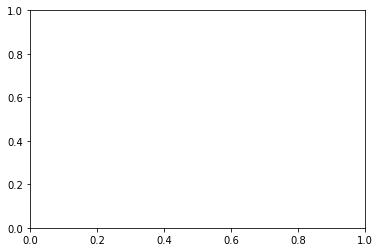

In [14]:
import warnings
import scipy.stats as st
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    bad = 0
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            print distribution
            pass

            
    print (float(bad)/float(len(DISTRIBUTIONS)))

    return (best_distribution.name, best_params)

#fig, ax = plt.subplots(1,1)
non_zero = []
for item in a[:,1:]:
    if item > 0.0001:
        non_zero +=[item]
best_fit_distribution(non_zero, bins=100, ax=None)

In [18]:
print st.alpha.pdf(1,loc = loc,scale = scale,*arg)
print st.norm.pdf(0.036,0.03663020833333428, 0.07827135440753498)

0.0019242207071261655
5.096747747840946


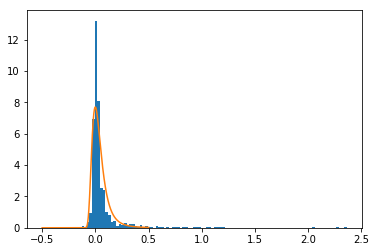

In [15]:
dis = st.alpha
params =  dis.fit(a[:,1])
#print params
arg = params[:-2]
loc = params[-2]
scale = params[-1]
x = np.linspace(-0.5,0.5, 1000)
n, bins, patches = plt.hist(a[:,1],bins=100, density = True)
plt.plot(x, dis.pdf(x,loc = loc,scale = scale,*arg))

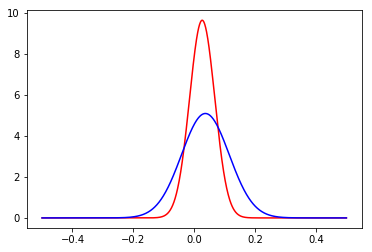

Text(0,0.5,'Number of bits')

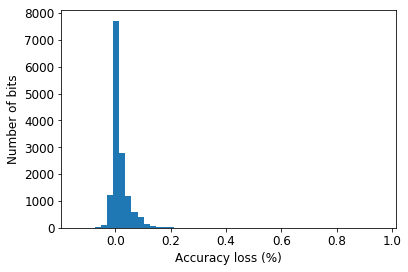

In [5]:
n, bins, patches = plt.hist(a[:,1],50,histtype='bar')
#n, bins, patches = plt.hist(b.reshape(-1),int(len(b.reshape(-1))/300),histtype='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Accuracy loss (%)', fontsize=12)
plt.ylabel('Number of bits', fontsize=12)

Text(0,0.5,'Number of bits')

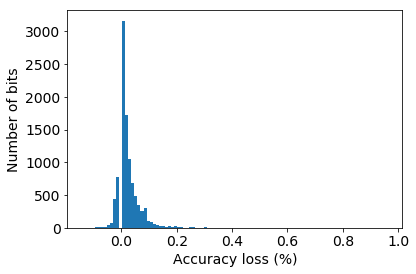

In [8]:
pos = []
for item in a[:,1]:
    if abs(item) > 0.0001:
        pos += [item]
n, bins, patches = plt.hist(pos,100,histtype='bar')
fontsize = 14
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Accuracy loss (%)', fontsize=fontsize)
plt.ylabel('Number of bits', fontsize=fontsize)

In [10]:
import scipy.stats as st
bins = 50
y, x = np.histogram(pos, bins=bins, density=False)
x = (x + np.roll(x, -1))[:-1] / 2.0

params = st.norm.fit(pos,bins = 100, density = True)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate fitted PDF and error with fit in distribution
pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))
print max(pdf)

9.644392331260853


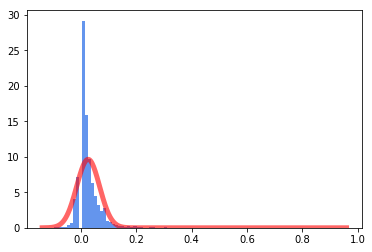

In [12]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)

x = np.linspace(min(pos),max(pos), 1000)
n, bins, patches = ax.hist(pos,100,histtype='bar',color = 'cornflowerblue', normed=True)
ax.plot(x, norm.pdf(x,loc,scale),
        'r-', lw=5, alpha=0.6, label='norm pdf')